In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

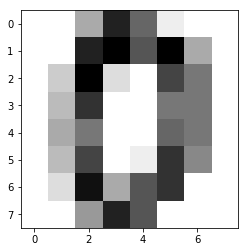

0


In [2]:
digits = datasets.load_digits()
plt.imshow(digits.images[0],cmap='binary')
plt.show()
print(digits.target[0])
# dir(digits)
# digits.images.shape

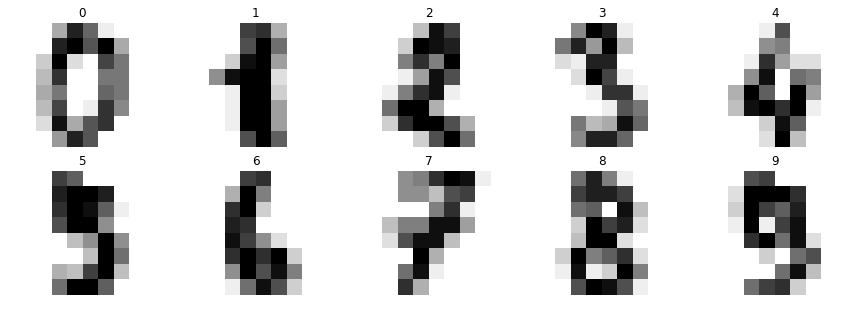

In [3]:
fig = plt.figure(figsize = (15,5))
for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.imshow(digits.images[i], cmap = 'binary')
    plt.title(digits.target[i])
    plt.axis('off')
plt.show()

In [4]:
x = digits.images.reshape((digits.images.shape[0],
                           digits.images.shape[1] * digits.images.shape[2]))
y = digits.target

x_train = x[:1000]
y_train = y[:1000]

x_test = x[1000:]
y_test = y[1000:]

In [48]:
from sklearn.neural_network import MLPClassifier

In [49]:
mlp = MLPClassifier(hidden_layer_sizes=(30,40,20),
                   activation='logistic',
                   solver = 'sgd',
                   tol = 1e-4,
                   learning_rate_init=.1,
                   verbose=True)

In [50]:
mlp.fit(x_train,y_train)

Iteration 1, loss = 2.34056279
Iteration 2, loss = 2.30127970
Iteration 3, loss = 2.31110943
Iteration 4, loss = 2.30466661
Iteration 5, loss = 2.30422721
Iteration 6, loss = 2.30060950
Iteration 7, loss = 2.29964484
Iteration 8, loss = 2.29802906
Iteration 9, loss = 2.29611083
Iteration 10, loss = 2.29633447
Iteration 11, loss = 2.29221714
Iteration 12, loss = 2.29088830
Iteration 13, loss = 2.28844653
Iteration 14, loss = 2.28229666
Iteration 15, loss = 2.27831367
Iteration 16, loss = 2.27122644
Iteration 17, loss = 2.26151863
Iteration 18, loss = 2.24916777
Iteration 19, loss = 2.23030948
Iteration 20, loss = 2.20673986
Iteration 21, loss = 2.17258709
Iteration 22, loss = 2.12165486
Iteration 23, loss = 2.05608658
Iteration 24, loss = 1.97581181
Iteration 25, loss = 1.89359441
Iteration 26, loss = 1.81682664
Iteration 27, loss = 1.74736549
Iteration 28, loss = 1.69086673
Iteration 29, loss = 1.64022676
Iteration 30, loss = 1.59398115
Iteration 31, loss = 1.54640030
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 40, 20), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [107]:
predictions = mlp.predict(x_test)
print(predictions[:10])
print(y_test[:10])

[2 5 2 0 0 9 7 6 3 2 9]
[2 8 2 0 0 1 7 6 3 2 1]


In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y_test,predictions)

array([[77,  0,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 1, 69,  2,  0,  2,  0,  1,  0,  1,  4],
       [ 0,  0, 67,  9,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  5, 70,  0,  3,  1,  0,  0,  0],
       [ 0,  1,  0,  0, 76,  0,  3,  0,  2,  1],
       [ 3,  0,  0,  0,  0, 71,  1,  3,  4,  0],
       [ 0,  1,  0,  0,  0,  0, 79,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 76,  0,  2],
       [ 0,  3,  1,  2,  2,  5,  0,  1, 60,  2],
       [ 0,  0,  0,  3,  0,  2,  0,  2,  1, 73]], dtype=int64)

In [54]:
import pandas as pd

In [55]:
pd.crosstab(y_test,predictions,rownames=["True"],colnames=["pradicted"],margins = True)

pradicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,77,0,0,0,0,0,2,0,0,0,79
1,1,69,2,0,2,0,1,0,1,4,80
2,0,0,67,9,0,1,0,0,0,0,77
3,0,0,5,70,0,3,1,0,0,0,79
4,0,1,0,0,76,0,3,0,2,1,83
5,3,0,0,0,0,71,1,3,4,0,82
6,0,1,0,0,0,0,79,0,0,0,80
7,0,2,0,0,0,0,0,76,0,2,80
8,0,3,1,2,2,5,0,1,60,2,76


In [93]:
error = []
for i in range(0,len(y_test)):
    if predictions[i] == 9:
        if y_test[i] == 1:
            error.append(i+1000)

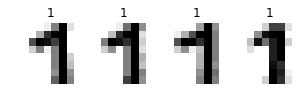

In [104]:
fig = plt.figure(figsize = (5,5))
for i in range(0,len(error)):
    plt.subplot(1,4,i+1)
    plt.imshow(digits.images[error[i]], cmap = 'binary')
    plt.title(digits.target[error[i]])
    plt.axis('off')
plt.show()